# Quickstart

## Working with data

In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor


In [5]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

`training_data` and `test_data` are `Dataset`s. We will pass them as an argument to DataLoader to wrap an iterable over them, which supports batshing, sampling, etc.

The batch size of 64 indicates that each element in the dataloader iterable will return a batch of 64 features and labels.

In [6]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


# Tensors

In [7]:
import torch
import numpy as np

In [8]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

In [9]:
# from numpy arrays
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [11]:
# new tensor tries to retain the properties (shape, datatype)
x_ones = torch.ones_like(x_data)
print(f"Ones tensor: {x_ones}")

x_rand = torch.rand_like(x_data, dtype = torch.float)
print(f"Random tensor: {x_rand}")


Ones tensor: tensor([[1, 1],
        [1, 1]])
Random tensor: tensor([[0.2474, 0.5688],
        [0.7430, 0.8446]])


In [12]:
# Shapes
shape = (2, 3, )
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros_like(ones_tensor)

print(f'Random tensor: \n{rand_tensor} \n')

print(f'Ones tensor: \n{ones_tensor} \n')

print(f'Zeroes tensor: \n{zeros_tensor} \n')

Random tensor: 
tensor([[0.5403, 0.0700, 0.9369],
        [0.7965, 0.3235, 0.9711]]) 

Ones tensor: 
tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeroes tensor: 
tensor([[0., 0., 0.],
        [0., 0., 0.]]) 



In [13]:
# Atributes of a tensor
tensor = torch.rand(3, 4)

print(f"Shape: {tensor.shape}")
print(f"Datatype: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")


Shape: torch.Size([3, 4])
Datatype: torch.float32
Device tensor is stored on: cpu


In [14]:
# Operations on Tensors

# Moving to the current accelerator (GPU)

if torch.accelerator.is_available():
    tensor = tensor.to(torch.accelerator.current_accelerator())



In [15]:
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[:, -1]}")
tensor[:, 1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [16]:
# Concatenation
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [20]:
# Matrix multiplication

y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)

print(y1)
print(y2)
print(y3)

# Element wise product
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(z1)
print(torch.mul(tensor, tensor, out=z3))





tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [21]:
# Converting a single element tensor to numerical value:

agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


In [22]:
# Inplace operations
print(f"{tensor} \n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [23]:
# Bridging with numpy
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [24]:
# Change in the tensor reflects in the numpy array
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [25]:
# Numpy array to ToTensor
n = np.ones(5)
t = torch.from_numpy(n)



In [27]:
# Changes in the numpy reflect in the tensor

np.add(n, 1, out=n)
print(f"t: {t}, n: {n}")

t.add_(1)
print(f"t: {t}, n: {n}")

t: tensor([4., 4., 4., 4., 4.], dtype=torch.float64), n: [4. 4. 4. 4. 4.]
t: tensor([5., 5., 5., 5., 5.], dtype=torch.float64), n: [5. 5. 5. 5. 5.]


# Datasets and dataloaders

In [29]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

We can index `Datasets` manually like a list: `training_data[index]`

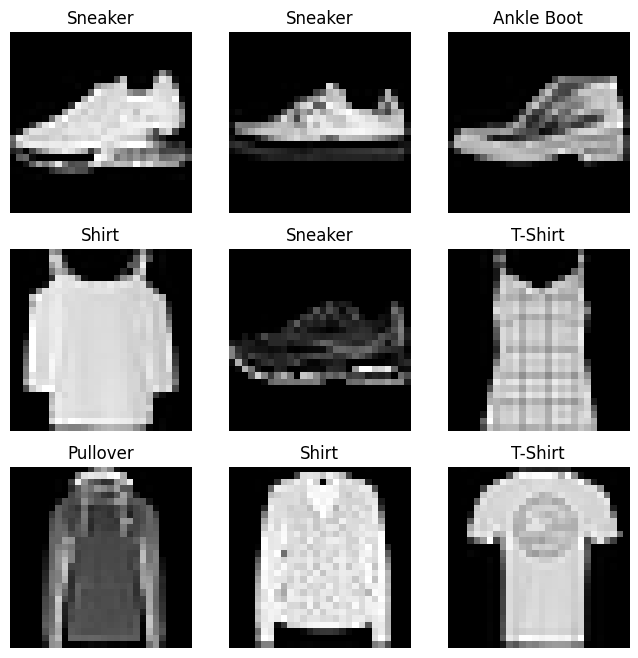

In [32]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    # This litterally just generates a random index to select from training_data
    sample_idx = torch.randint(len(training_data), size=(1, )).item()
    img, label = training_data[int(sample_idx)]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()



## Custom Datasets

We can create custom dataset classes using the `Dataset` class as template .

This class must contain the functions `__init__`, `__len__`, `__getitem__`.

In [33]:
import os
import pandas as pd
from torchvision.io import decode_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, index):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = decode_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

## Preparing data
We now use DataLoatder that wraps a Dataset, and allows us to perform operations more easily on the dataset (the operations we will be doing when training the model).



In [34]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Each iteration will now return a batch from the datasets, containing batch_size features and labels. `shuffle=True` indicates that after iterating over all the batches the data will be shuffled.


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


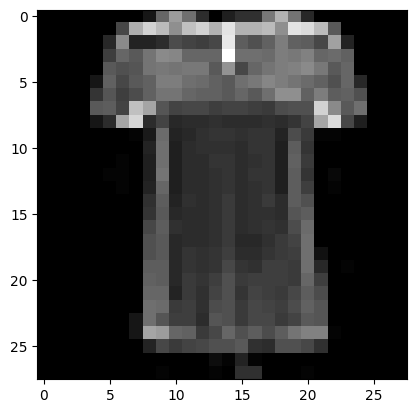

Label: 6


In [41]:
# Diplay image and label
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# Transforms
To manipulate the data and make it suitable for training, we use transforms. 

All TorchVision datasets have two parameters: `transform` to modify the features and `target_transform` to modify the labels. Both parameters accept callables containing the transformation logic.

`torchvision.transforms` contains several commonly used transforms.

For example, in FashionMNIST, the features are images and labels integers. For training, we need the features as normalized tensors and labels as one-hot encoded tensors. Hence, we use `ToTensor` and `Lambda`.

In [1]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)



## ToTensor()

converts a PIL image or Numpy `ndarray` into a `FloatTensor`. This scales the image's pixel intensity values in the range [0., 1.]


## Lambda Transforms

Lambda transforms apply any user-defined lambda function.

In the example we first created a tensor with 10 zeroes and then assign 1 t the index given by the label `y`

# Build the Neural Network

The torch.nn namespace provides all the building blocks needed for a neural network.

Every module in PyTorch subclasses the nn.Module.

A neural network is a module itself that consists of other modules (layers).


In [2]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

## Getting the device

In [5]:
device = torch.accelerator.current_accelerator() if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


## Define the Class

We define our neural network by subclassing nn.Module, and initialize the neural network layers in `__init__`. Every `nn.Module` subclass implements the operations on input data in the forward method.

In [6]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    


In [7]:
model = NeuralNetwork().to(device)
print(model)


NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


To use the model, we pass the input data. This executes the model's `forward`, along with some background operations. Do not call the model.forward() directly.

Calling the model on the input will return a 2-dimensional tensor with dim=0 corresponding to each output of 10 raw predicted values for each class, and dim=1 corresponding to the individual values of each output. We get the prediction probabilities by passing it through an instance of the nn.Softmax module

In [10]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")


Predicted class: tensor([8], device='cuda:0')


In [11]:
print(logits)

tensor([[-0.1203,  0.0075,  0.0139, -0.0420, -0.1418, -0.0259, -0.0228, -0.0143,
          0.0154, -0.0210]], device='cuda:0', grad_fn=<AddmmBackward0>)


## Model Layers

Let's see what happens with three images when passing them through the network:



In [12]:
input_image = torch.rand(3, 28, 28)
print(input_image.size())

torch.Size([3, 28, 28])


### `nn.Flatten`

converts each 2D 28x28 image into a continuous array of 748 pixel values. (We keep the 3 images separated).

In [13]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())


torch.Size([3, 784])


### `nn.Linear`

Applies a linear transformation on the input using stored weights and biases.

In [14]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())


torch.Size([3, 20])


### `nn.ReLU`

Nonlinear activation funciton.

In [15]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-0.1354,  0.3903, -0.1990, -0.5939,  0.3034, -0.0578, -0.3310, -0.4349,
         -0.2656,  0.0240, -0.5093,  0.0452,  0.3862,  0.2466, -0.1258,  0.2202,
         -0.7655, -0.0663, -0.1467, -0.4217],
        [-0.0235,  0.3388, -0.2124, -0.3354,  0.3975,  0.0523,  0.3553, -0.5615,
         -0.5226,  0.2287, -0.1790, -0.0193,  0.2792,  0.2793, -0.2970,  0.1684,
         -0.5589,  0.0626,  0.1217, -0.6101],
        [-0.2548,  0.0123, -0.3578, -0.4062,  0.1763,  0.1773,  0.0678, -0.6828,
         -0.2761, -0.1194, -0.0467, -0.1823,  0.1348,  0.3847, -0.0240,  0.2472,
         -0.2314, -0.1027, -0.0114, -0.3717]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.3903, 0.0000, 0.0000, 0.3034, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0240, 0.0000, 0.0452, 0.3862, 0.2466, 0.0000, 0.2202, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.0000, 0.3388, 0.0000, 0.0000, 0.3975, 0.0523, 0.3553, 0.0000, 0.0000,
         0.2287, 0.0000, 0.0000, 0.2792, 0.2793, 0.00

### `nn.Sequential`

is an ordered container of modules. The data is passed through all the modules in the same order as defined.

In [16]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3, 28, 28)
logits = seq_modules(input_image)

### `nn.Softmax`

Softmax



In [17]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)
print(pred_probab)

tensor([[0.1027, 0.1142, 0.1255, 0.1255, 0.0945, 0.0940, 0.0889, 0.0727, 0.0910,
         0.0910],
        [0.1183, 0.1188, 0.1149, 0.1296, 0.0842, 0.0911, 0.0807, 0.0668, 0.0934,
         0.1022],
        [0.1103, 0.1137, 0.1178, 0.1253, 0.0929, 0.0931, 0.0843, 0.0694, 0.0959,
         0.0972]], grad_fn=<SoftmaxBackward0>)


## Model paramenters


In [18]:
# We wil iterate over each parameter now, print its size and preview its values

print(f"Model structure: {model} \n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values: {param[:2]} \n")


Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values: tensor([[ 0.0046,  0.0111,  0.0124,  ...,  0.0007,  0.0137,  0.0350],
        [ 0.0029, -0.0074,  0.0131,  ...,  0.0306, -0.0220, -0.0004]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values: tensor([-0.0034, -0.0277], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values: tensor([[ 0.0289,  0.0245,  0.0077,  ...,  0.0166,  0.0137,  0.0187],
        [-0.0069,  0.0190, -0.0310,  ...,  0.0420, -0.0351,  0.0309]],
       device='cuda:0', grad_fn=<Slic

# Automatic Differentiation with `torch.autograd`

`torch.autograd` automatically computes the gradient for any computational graph (useful at backpropagation).

For instance, a one-layer neural network, input `x`, parameters `w`, `b` and a loss function:

In [20]:
import torch
x = torch.ones(5)
y = torch.zeros(3) # expected output
w = torch.randn(5, 3, requires_grad = True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w) + b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)
print(loss)


tensor(1.3408, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


within this computational graph, since we will need the gradient of the loos function with respect to variables w and b, we use `requires_grad=True` to specify that we need these gradients to be calculated.

In [21]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x70dc564d8f10>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x70dc564d8df0>


## Computing gradients

To optimize the weights, we need the **Gradients with respect to the parameters for a fixed input**. To compute this, we just call `loss.backward()` and retrieve the parameter gradients.

In [22]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.0154, 0.0966, 0.3245],
        [0.0154, 0.0966, 0.3245],
        [0.0154, 0.0966, 0.3245],
        [0.0154, 0.0966, 0.3245],
        [0.0154, 0.0966, 0.3245]])
tensor([0.0154, 0.0966, 0.3245])


## Disabling Gradient Tracking

If we, for example, have finished training, and will only do forward computations for now on, we can stop tracking computations by surronding the computation code with torch.no_grad() block:


In [23]:
z = torch.matmul(x, w) + b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w) + b
print(z.requires_grad)

True
False


In [24]:
# other method

z = torch.matmul(x, w) + b
z_det = z.detach()
print(z_det.requires_grad)

False


# Optimizing the network

In [32]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root = "data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download=True,
    transform=ToTensor()
)


train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    
model = NeuralNetwork()


In [33]:
# Hyperparameters
learning_rate = 1e-3
batch_size = 64
epochs = 5

## Epochs
Each iteration of the optimization loop is called an epoch.
Each epoch consists of two parts:

- **Train Loop**: iterate over the training dataset and try to converge to optimal parameters.
- **Validation loop**: iterate over the test dataset to check if model performance is improving


## loss function


In [34]:
loss_fn = nn.CrossEntropyLoss()


## Optimizers

Optimization algorithms define how the process of adjusting model parameters is performed. All the logic is encapsulated in the optimizer object.

There are many different optimizers available, that work better for different kinds of models and data.

We initialize the optimizer by registering the model's parameters that need to be trained, and passing the learning rate.



In [35]:
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

Inside the training loop, optimization happens in three steps:

- Call `optimizer.zero_grad()` to reset the gradients of model parameters. (Gradiens by default add up)
- Backpropagate the prediction loss with a call to `loss.backward()`. PyTorch deposits the gradients of the loss with respect to each parameter.
- Then, we call `optimizer.step()` to adjust the parameters by the gradients collected.




In [38]:
# Full implementation

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model for training model. Important for batch normalization
    model.train()
    for batch, (X, y) in enumerate(dataloader):

        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropatation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss}, [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode

    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensuring that gradients are not computed

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    

In [39]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n ---------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)

print("Done!")

Epoch 1
 ---------------------
loss: 2.1597931385040283, [   64/60000]
loss: 2.152308940887451, [ 6464/60000]
loss: 2.0905792713165283, [12864/60000]
loss: 2.11921763420105, [19264/60000]
loss: 2.057128429412842, [25664/60000]
loss: 2.004812240600586, [32064/60000]
loss: 2.0367531776428223, [38464/60000]
loss: 1.948514699935913, [44864/60000]
loss: 1.9529054164886475, [51264/60000]
loss: 1.9030466079711914, [57664/60000]
Test Error: 
 Accuracy: 51.6%, Avg loss: 1.886654 

Epoch 2
 ---------------------
loss: 1.9066790342330933, [   64/60000]
loss: 1.8851983547210693, [ 6464/60000]
loss: 1.7575665712356567, [12864/60000]
loss: 1.8256242275238037, [19264/60000]
loss: 1.6985121965408325, [25664/60000]
loss: 1.6510663032531738, [32064/60000]
loss: 1.6915966272354126, [38464/60000]
loss: 1.5775587558746338, [44864/60000]
loss: 1.6119581460952759, [51264/60000]
loss: 1.5234339237213135, [57664/60000]
Test Error: 
 Accuracy: 59.0%, Avg loss: 1.527733 

Epoch 3
 ---------------------
loss: 1.5

# Saving and loading the models

In [40]:
import torch
import torchvision.models as models

Models store the learned parameters in an internal state dictionary called `state_dict`. These can be persisted using the torch.save method.

In [41]:
model = models.vgg16(weights='IMAGENET1K_V1')
torch.save(model.state_dict(), 'model_weights.pth')

To load model weights, we create an instance of the same model first, and then load the parameters using `load_state_dict()` method.

`weights_only=True` is just a best practice when loading weights.


In [42]:
model = models.vgg16() # Untrained model (we didn't especified weights)

model.load_state_dict(torch.load('model_weights.pth', weights_only=True))
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

## Saving and Loading Models with Shapes

We might want to save the structure of the class (the network structure) along with the parameters, in which case we can pass `model` instead of `model.state_dict()` to the saving function:

In [43]:
torch.save(model, 'model.pth')

In [44]:
model = torch.load('model.pth', weights_only=False) # I honestly didn't understand why weights_only=False here.
